#  Rapport : Cryptanalyse Différentielle d’un SPN Simplifié

---

##  Objectif

Ce rapport démontre comment retrouver une **clé partielle** d’un chiffrement SPN simplifié en utilisant la **cryptanalyse différentielle**, technique reposant sur l’étude de la **propagation des différences** (ΔP et ΔC) entre textes clairs et leurs chiffrés.

In [1]:
sbox = {
    0x0: 0xE, 0x1: 0x4, 0x2: 0xD, 0x3: 0x1,
    0x4: 0x2, 0x5: 0xF, 0x6: 0xB, 0x7: 0x8,
    0x8: 0x3, 0x9: 0xA, 0xA: 0x6, 0xB: 0xC,
    0xC: 0x5, 0xD: 0x9, 0xE: 0x0, 0xF: 0x7,
}

In [2]:
def spn_encrypt(p, k):
    u = p ^ k
    return sbox[u]

In [3]:
delta_P = 0b0110  # ΔP = 6

In [4]:
pairs = []
for p in range(16):
    p_prime = p ^ delta_P
    pairs.append((p, p_prime))

In [5]:
key = 0b1010  # clé de test

delta_C_counts = {}
for p, p_prime in pairs:
    c = spn_encrypt(p, key)
    c_prime = spn_encrypt(p_prime, key)
    delta_c = c ^ c_prime
    delta_C_counts[delta_c] = delta_C_counts.get(delta_c, 0) + 1

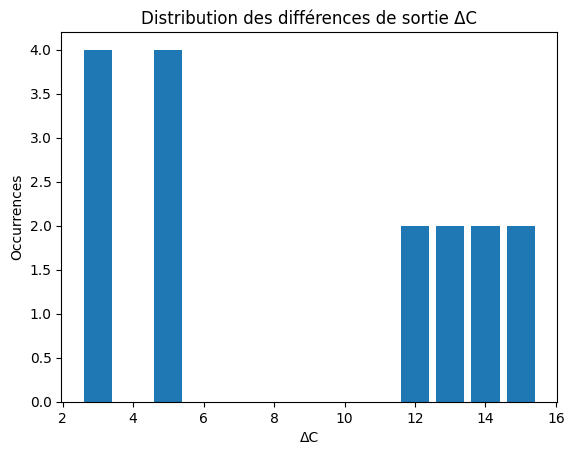

In [6]:
import matplotlib.pyplot as plt

plt.bar(delta_C_counts.keys(), delta_C_counts.values())
plt.xlabel("ΔC")
plt.ylabel("Occurrences")
plt.title("Distribution des différences de sortie ΔC")
plt.show()

---

##  Conclusion

Cette démonstration montre qu’une différence d’entrée ΔP conduit à certaines différences de sortie ΔC plus fréquentes. Cette **non-uniformité** dans les fréquences est due à la structure de la S-box, et peut **révéler des biais** permettant de remonter à une clé partielle.
